# Importing all the necessary libraries

In [1]:
from nltk.tokenize import word_tokenize,wordpunct_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from gensim.models import Word2Vec
import gensim
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import os
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Reading the data from the storage into a Dataframe

In [2]:
file_path = "datasets/national_anthems.csv"
data = pd.read_csv(file_path)

# Preprocessing of the data by dropping columsn and converting them to tokens

In [3]:
data = data.drop(columns=["Alpha-2", "Alpha-3", "Continent"], axis=1)

data["Anthem"] = data["Anthem"].apply(lambda x: x.lower())

data['tokens'] = data['Anthem'].apply(
    lambda x: [z for z in word_tokenize(x) if z not in string.punctuation]
)

nltk_stopword = set(stopwords.words("english"))
nltk_stopword.update(['thy', 'may', 'shall', 'u', "'s", 'let', 'one', 'thee',
                      'german', 'singapore', 'eritrea', 'oh', 'indonesia',
                      'africa', 'ha', 'ah', '...'])

with open("datasets/stopwordslist.txt", 'r') as file:
    file_stopwords = set(file.read().splitlines())
    nltk_stopword.update(file_stopwords)

stopword = nltk_stopword
stopword.update(['nation', 'flag', 'live', 'long'])

#stopword.update(['god', 'freedom', 'country', 'nation', 'glory', 'flag', 'love', 'liberty', 'live', 'peace', 'heart', 'great', 'blood', 'home'])

lemmatizer = WordNetLemmatizer()

data['tokens'] = data['tokens'].apply(
    lambda x: [lemmatizer.lemmatize(word) for word in x]
)

data['tokens'] = data['tokens'].apply(
    lambda x: [word for word in x if word not in stopword]
)

unique_words = set(word for token in data['tokens'] for word in token)

print(len(unique_words))
print(data.head(2))

3057
   Country                                             Anthem  \
0  Albania  around our flag we stand united, with one wish...   
1  Armenia  our fatherland, free, independent, that has fo...   

                                              tokens  
0  [stand, united, goal, sacred, oath, bestow, pr...  
1  [fatherland, free, independent, century, lived...  


# Other preprocessing part which was discarded later in production

In [4]:
#import spacy
#nlp= spacy.load('en_core_web_sm')
#spacy_Stopwords=nlp.Defaults.stop_words
#print(spacy_Stopwords)
#nltk_stopword.update(spacy_Stopwords)
#stopword = nltk_stopword #| spacy_Stopwords
#print(stopword)
#print(unique_words)
#print(stopword)

# Create the Word2Vec model which will convert the tokens into sentence vectors

In [5]:

model1=Word2Vec(data['tokens'],min_count=15,epochs=7,workers=5,vector_size=1600)

# Checking various types of Sentence Vectors

In [6]:
# Sentence Vectorization
def sentence_vector(sentence, model=model1):
    return np.mean([model.wv[word] for word in sentence if word in model.wv], axis=0)

data[f"Sentence_Vector_{1}"] = data['tokens'].apply(
    lambda x: sentence_vector(x)
)

def sentence_vector2(sentence, model=model1):
    return np.max([model.wv[word] for word in sentence if word in model.wv], axis=0)

data[f"Sentence_Vector_{2}"] = data['tokens'].apply(
    lambda x: sentence_vector2(x)
)

def sentence_vector3(sentence, model=model1):
    return np.sum([model.wv[word] for word in sentence if word in model.wv], axis=0)

data[f"Sentence_Vector_{3}"] = data['tokens'].apply(
    lambda x: sentence_vector3(x)
)


silhoutte score- where its put in the correct cluster or not based on distance from points
wcss- how close the points of each cluster are to their centorid 

# Check the clustering on Various types of sentence vectors and their score

This is for Sentence Vector 1

WCSS Score for 3 clusters: 0.48738980293273926
Silhouette Score for 3 clusters: 0.5030665993690491

WCSS Score for 4 clusters: 0.24793864786624908
Silhouette Score for 4 clusters: 0.5600149631500244

WCSS Score for 5 clusters: 0.16597439348697662
Silhouette Score for 5 clusters: 0.5300966501235962

WCSS Score for 6 clusters: 0.1311386227607727
Silhouette Score for 6 clusters: 0.4994509220123291

WCSS Score for 7 clusters: 0.09836025536060333
Silhouette Score for 7 clusters: 0.5114303827285767

WCSS Score for 8 clusters: 0.0760277584195137
Silhouette Score for 8 clusters: 0.5225721001625061

WCSS Score for 9 clusters: 0.05521664768457413
Silhouette Score for 9 clusters: 0.5157044529914856


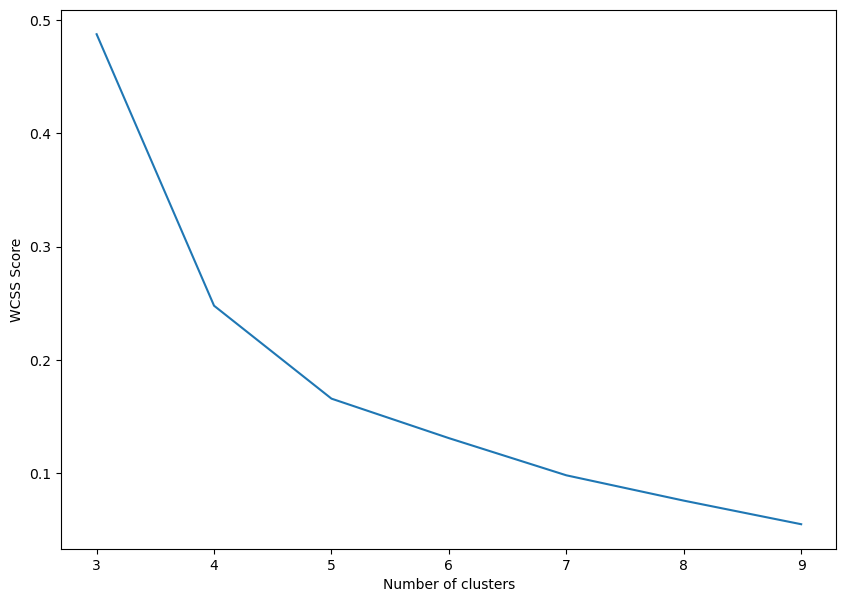

This is for Sentence Vector 2

WCSS Score for 3 clusters: 1.0372097492218018
Silhouette Score for 3 clusters: 0.7266297936439514

WCSS Score for 4 clusters: 0.9291262626647949
Silhouette Score for 4 clusters: 0.6454688906669617

WCSS Score for 5 clusters: 0.6061914563179016
Silhouette Score for 5 clusters: 0.4476281404495239

WCSS Score for 6 clusters: 0.5282322764396667
Silhouette Score for 6 clusters: 0.4595724940299988

WCSS Score for 7 clusters: 0.4456997215747833
Silhouette Score for 7 clusters: 0.4614717960357666

WCSS Score for 8 clusters: 0.3097704350948334
Silhouette Score for 8 clusters: 0.4670441448688507

WCSS Score for 9 clusters: 0.2645004689693451
Silhouette Score for 9 clusters: 0.47904977202415466


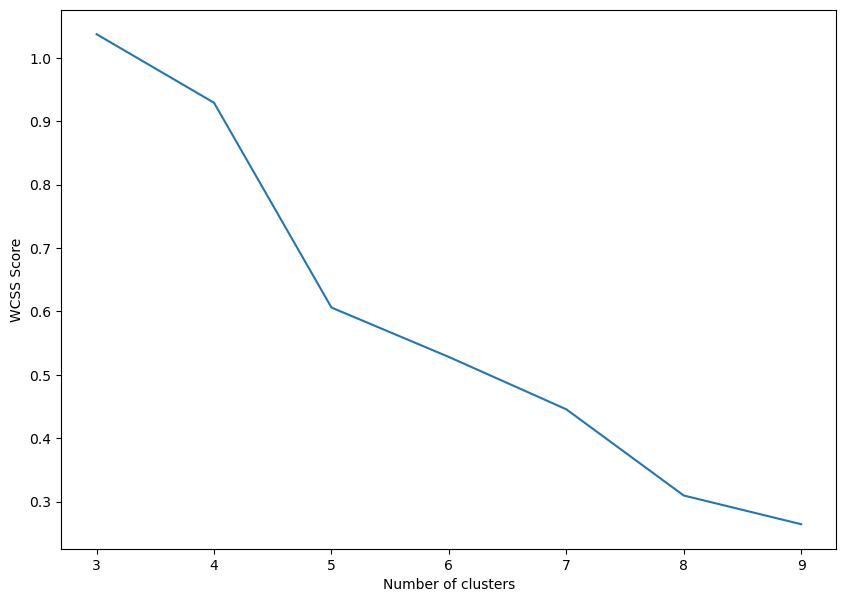

This is for Sentence Vector 3

WCSS Score for 3 clusters: 29294.2734375
Silhouette Score for 3 clusters: 0.6809398531913757

WCSS Score for 4 clusters: 14211.7998046875
Silhouette Score for 4 clusters: 0.5461353659629822

WCSS Score for 5 clusters: 7511.7333984375
Silhouette Score for 5 clusters: 0.5950276255607605

WCSS Score for 6 clusters: 5039.97705078125
Silhouette Score for 6 clusters: 0.5817226767539978

WCSS Score for 7 clusters: 4209.3203125
Silhouette Score for 7 clusters: 0.54036545753479

WCSS Score for 8 clusters: 2740.6103515625
Silhouette Score for 8 clusters: 0.5878185629844666

WCSS Score for 9 clusters: 2035.483642578125
Silhouette Score for 9 clusters: 0.5648685097694397


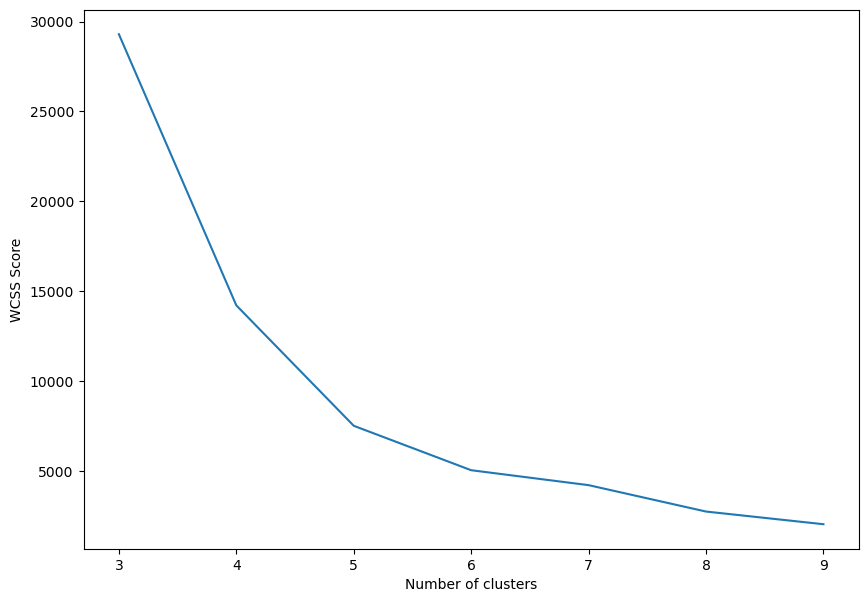

In [7]:
# Set the number of threads for MKL to 1
os.environ["OMP_NUM_THREADS"] = "1"

for i in range(1, 4):
    print(f"This is for Sentence Vector {i}")
    matrix = np.array(data[f"Sentence_Vector_{i}"].tolist())
    wcss = []

    # Iterate over possible cluster counts
    for num_clusters in range(3, 10):
        kmea = KMeans(n_clusters=num_clusters, max_iter=400, algorithm='elkan', random_state=42)
        labels = kmea.fit_predict(matrix)
        wcss.append(kmea.inertia_)
        
        # Print metrics for each cluster count
        print(f"\nWCSS Score for {num_clusters} clusters: {kmea.inertia_}")
        sil_score = silhouette_score(matrix, labels)
        print(f"Silhouette Score for {num_clusters} clusters: {sil_score}")

    # Plot the scores
    plt.figure(figsize=(10, 7))
    plt.plot(list(range(3, 10)), wcss)
    plt.xticks([3, 4, 5, 6, 7, 8, 9])
    plt.xlabel("Number of clusters")
    plt.ylabel("WCSS Score")
    plt.show()


# Training the final model

In [8]:
# Convert Sentence_Vector_1 column to a matrix
matrix = np.array(data[f"Sentence_Vector_{1}"].tolist())

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=400, algorithm='elkan')
data["cluster"] = kmeans.fit_predict(matrix)
labels = data['cluster']

# Print cluster counts
print(data['cluster'].value_counts())

# Calculate and print the silhouette score
sil_score = silhouette_score(matrix, data['cluster'])
print(f"Final Silhouette Score: {sil_score}")


cluster
3    76
0    66
1    27
2    21
Name: count, dtype: int64
Final Silhouette Score: 0.5600149631500244


# Visualization of the Model 

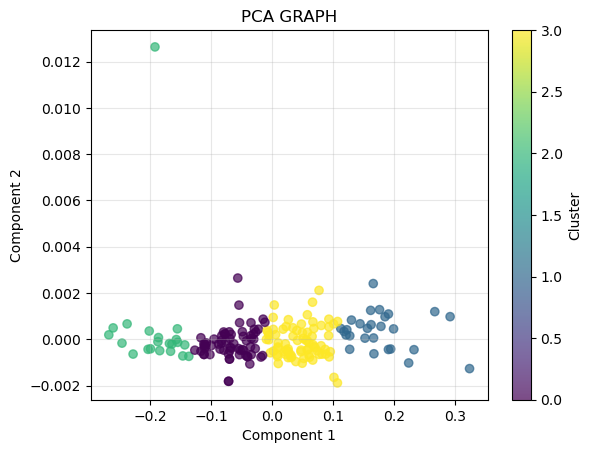

In [9]:

pca=PCA(n_components=2)
reduced_data=pca.fit_transform(matrix)
plt.figure()
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title("PCA GRAPH")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(alpha=0.3)
plt.show()

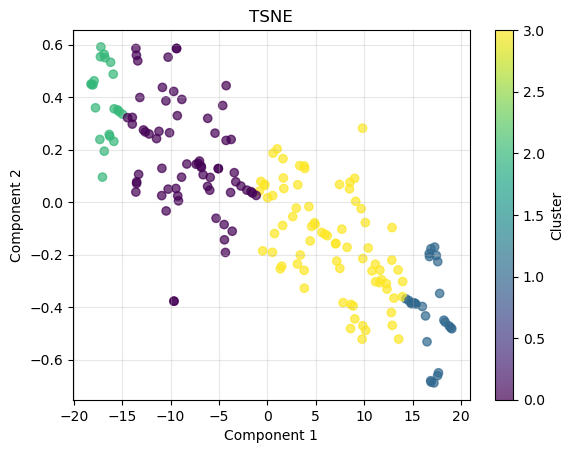

In [10]:

reducer = TSNE(n_components=2, random_state=42)
reduced_data = reducer.fit_transform(matrix)
plt.figure()
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title("TSNE")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(alpha=0.3)
plt.show()

# Checking the most Common words of each cluster

In [11]:
from collections import Counter

for i in sorted(data['cluster'].unique()):
    cluster_sentences = data[data['cluster'] == i]['tokens']
    all_words = [word for sentence in cluster_sentences for word in sentence] 
    common_words = Counter(all_words).most_common(30)
    print(f"Cluster {i} Common Words: {common_words}")


Cluster 0 Common Words: [('god', 59), ('freedom', 39), ('people', 34), ('fatherland', 33), ('land', 32), ('love', 32), ('great', 31), ('arise', 29), ('arm', 28), ('free', 27), ('blood', 27), ('world', 26), ('peace', 26), ('light', 24), ('heart', 24), ('homeland', 24), ('bless', 23), ('happiness', 22), ('time', 22), ('hand', 21), ('child', 21), ('rise', 21), ('thousand', 21), ('glory', 20), ('liberty', 20), ('march', 20), ('forever', 19), ('day', 19), ('unity', 19), ('country', 19)]
Cluster 1 Common Words: [('land', 66), ('people', 26), ('free', 23), ('country', 23), ('sea', 15), ('great', 14), ('god', 13), ('love', 13), ('homeland', 12), ('glory', 11), ('heart', 10), ('sun', 10), ('peace', 10), ('freedom', 9), ('give', 8), ('blood', 7), ('father', 7), ('mountain', 6), ('son', 6), ('hope', 6), ('papua', 6), ('stand', 6), ('home', 5), ('beautiful', 5), ('fatherland', 5), ('language', 5), ('beloved', 5), ('time', 5), ('dear', 5), ('unity', 5)]
Cluster 2 Common Words: [('witness', 12), ('s

# Naming of Clusters

In [12]:
#drop vecor 2 and 3 since we uing 1
#add cluyster anme to it
data['cluster_names'] = data['cluster'].map({
    0: 'Echoes of Sacred Freedom',
    1: 'O Motherly Nature',
    2: 'A Child’s Voice',
    3: 'Glorious Homeland'
})


In [13]:
print(data.head(1))

   Country                                             Anthem  \
0  Albania  around our flag we stand united, with one wish...   

                                              tokens  \
0  [stand, united, goal, sacred, oath, bestow, pr...   

                                   Sentence_Vector_1  \
0  [-0.025477348, 0.0016324663, 0.00392037, 0.031...   

                                   Sentence_Vector_2  \
0  [-0.0169175, 0.003053656, 0.007340177, 0.05572...   

                                   Sentence_Vector_3  cluster  \
0  [-0.71336573, 0.04570906, 0.10977035, 0.887709...        0   

              cluster_names  
0  Echoes of Sacred Freedom  


# Creating wordclouds for all the clusters

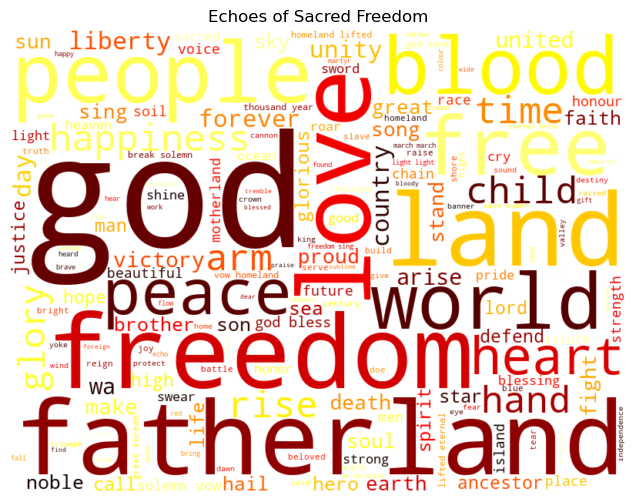

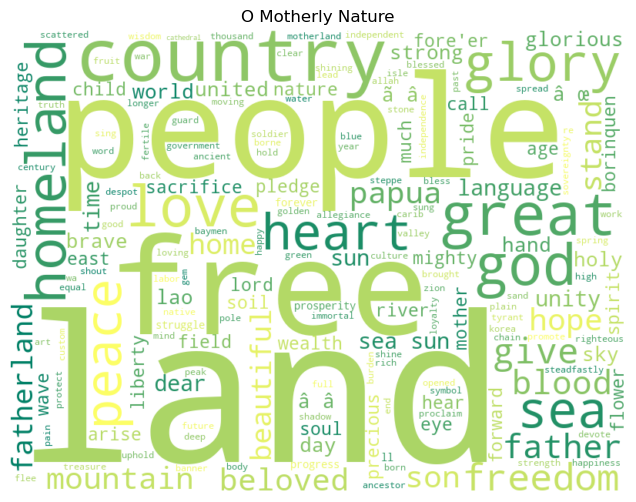

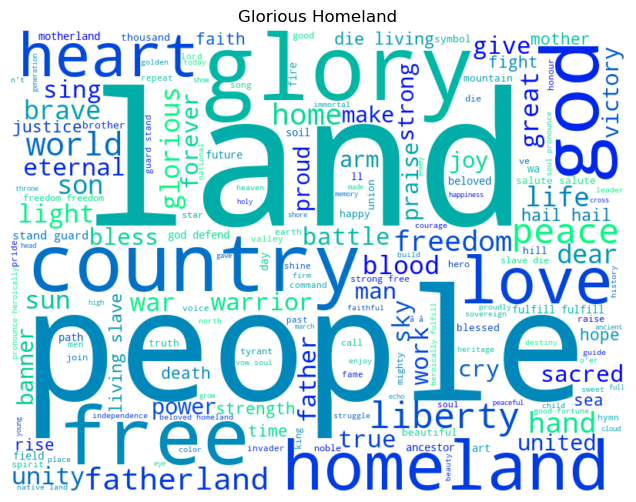

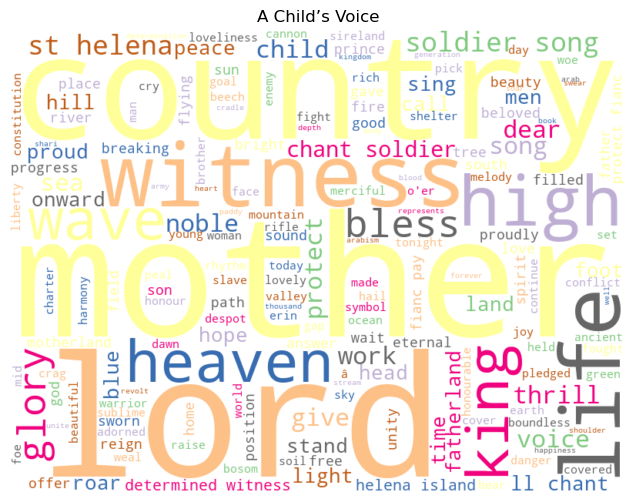

In [14]:
colormaps = {
    'Echoes of Sacred Freedom': 'hot',
    'O Motherly Nature': 'summer',
    'A Child’s Voice': 'Accent',
    'Glorious Homeland': 'winter'
}

mask_folder = "images"

for label in data["cluster_names"].unique():
    tokens = data[data["cluster_names"] == label]["tokens"]
    text = ' '.join([token for tokens_list in tokens for token in tokens_list])
    wc = WordCloud(
        background_color="white",
        colormap=colormaps[label],
        width=800,
        height=600,
        max_words=180
    ).generate(text)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(label)
    plt.axis("off")
    plt.savefig(f"{mask_folder}/{label}_wordcloud.png")
    plt.show()


In [15]:
data=data.drop(columns=['tokens','Sentence_Vector_1','Sentence_Vector_2','Sentence_Vector_3'],axis=0)
data.to_csv(r'datasets\updateddataset.csv')

In [16]:
data.head()

,Country,Anthem,cluster,cluster_names
0,Albania,"around our flag we stand united, with one wish...",0,Echoes of Sacred Freedom
1,Armenia,"our fatherland, free, independent, that has fo...",0,Echoes of Sacred Freedom
2,Austria,"land of mountains, land by the river, land of ...",1,O Motherly Nature
3,Azerbaijan,"azerbaijan, azerbaijan! the glorious fatherlan...",3,Glorious Homeland
4,Belarus,"we, belarusians, are peaceful people, wholehea...",3,Glorious Homeland
